## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

## 用广州地铁线路图代替北京的，用 wiki+高德地图代替百度的

In [1]:
import requests
import re
from bs4 import BeautifulSoup
from collections import defaultdict


def get_each_line_station(url):
    """
    获取每一条地铁线的站点信息
    :param url: https://zh.wikipedia.org/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF （如：1号线）
    :return: list列表存储的所有站点信息
    """
    resp = requests.get(url, timeout=30)
    resp.encoding = 'utf-8'
    s = BeautifulSoup(resp.text, "html.parser")
    tab = s.find_all('table', attrs={"class": "wikitable", "align": "center"})
    station_list = re.findall(r'<th><a href="/wiki/.+" title=".+">(.+)</a>', str(tab))

    return station_list


def get_cantion_metro(lines_dict):
    """
    获取广州的所有地铁信息
    :param lines_dict: 输入的字典形式为:{'1号线': 'https:/..','2号线': 'https:/..'}
    :return: {'1号线': ['广州东站', '体育中心', ...],'2号线':[]...}
    """
    for k_name, v_url in lines_dict.items():
        lines_dict[k_name] = get_each_line_station(lines_dict[k_name])
    return lines_dict


def get_all_stations(lines_dict):
    """
    将一个城市的所有地铁站信息存储到一个List中
    :param lines_dict:
    :return:
    """
    stations = set()
    for k_name, v_value in lines_dict.items():
        stations.update(lines_dict[k_name])
    return stations

In [2]:
    # 在国内使用requests请求wiki,google等国外的地址，需要设置代理，将小飞机设置为全局代理
    response = requests.get('https://zh.wikipedia.org/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%81')
    response.encoding = 'utf-8'
    # 解析wiki的html，得到beautiful对象
    soup = BeautifulSoup(response.text, "html.parser")
    # 查找bs想要获取的表格，查看html代码，表格的头数据是：
    # <table class="wikitable" align="center" style="width: 100%;">，变成soup的find_all是attrs={}
    tables = soup.find_all('table', attrs={"class": "wikitable", "align": "center", "style": "width: 100%;"})
    # print(tables)   #将数据丢到xx.html文件展示
    pattern = re.compile(r'<a.+?href="(/wiki/.+)" title=".+">(.+线)</a>')
    lines = pattern.findall(str(tables))
    print(type(lines))
    print('获取到广州的地铁路线为：')
    for line in lines:
        print(line)
    # 将获取的线路存到字典中
    canton_lines = {}
    for line in lines:
        canton_lines[line[1]] = 'https://zh.wikipedia.org' + line[0]
    print(canton_lines)

<class 'list'>
获取到广州的地铁路线为：
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '1号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF', '2号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF', '3号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF', '4号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF', '5号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF', '6号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF', '7号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF', '8号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF', '9号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF', '13号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF', '14号线')
('/wiki/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8121%E5%8F%B7%E7%BA%BF', '21号线')
('/wiki/%E5%B9%BF%E4%BD%9B%E7%BA%BF', '广佛线')
('/wiki/%E7%8F%A0%E6%B1%9F%E6%96%B0%E5%9F%8E%

In [3]:
    all_lines = get_cantion_metro(canton_lines)
    print('=' * 20)
    print(all_lines)

{'1号线': ['广州东站', '体育中心', '体育西路', '杨箕', '东山口', '烈士陵园', '农讲所', '公园前', '西门口', '陈家祠', '长寿路', '黄沙', '芳村', '花地湾', '坑口', '西塱'], '2号线': ['嘉禾望岗', '黄边', '江夏', '萧岗', '白云文化广场', '白云公园', '飞翔公园', '三元里', '广州火车站', '越秀公园', '纪念堂', '公园前', '海珠广场', '市二宫', '江南西', '昌岗', '江泰路', '东晓南', '南洲', '洛溪', '南浦', '会江', '石壁', '广州南站'], '3号线': ['番禺广场', '市桥', '汉溪长隆', '大石', '厦滘', '沥滘', '大塘', '客村', '广州塔', '珠江新城', '石牌桥', '岗顶', '华师', '五山', '天河客运站', '林和西', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南'], '4号线': ['黄村', '车陂', '车陂南', '万胜围', '官洲', '大学城北', '大学城南', '新造', '石碁', '海傍', '低涌', '东涌', '庆盛', '黄阁汽车城', '黄阁', '蕉门', '金洲', '飛沙角', '广隆', '大涌', '塘坑', '南橫', '南沙客运港'], '5号线': ['文冲', '大沙东', '大沙地', '鱼珠', '三溪', '东圃', '车陂南', '科韵路', '员村', '潭村', '猎德', '珠江新城', '五羊邨', '杨箕', '动物园', '区庄', '淘金', '小北', '广州火车站', '西村', '西场', '中山八', '坦尾', '滘口'], '6号线': ['浔峰岗', '横沙', '沙贝', '河沙', '坦尾', '如意坊', '黄沙', '文化公园', '一德路', '海珠广场', '北京路', '團一大廣場', '东湖', '东山口', '区庄', '黄花岗', '沙河顶', '天平架', '燕塘', '天河客运站', '长湴', '植物园', '龙洞', '柯木塱', '

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [4]:
    all_stations = get_all_stations(all_lines)
    print('广州市地铁站的个数：', len(all_stations))
    print(all_stations)

广州市地铁站的个数： 224
{'清塘', '瀝滘', '同和', '镇龙北', '西门口', '𧒽岗', '厦滘', '车陂南', '蕉门', '陈家祠', '体育中心', '石碁', '柯木塱', '庆盛', '动物园', '海珠广场', '南村万博', '猎德', '新城東', '石壁', '浔峰岗', '暹崗', '赤岗', '琶洲', '南海神庙', '坦尾', '紅衛', '大沙东', '淘金', '钟村', '江夏', '员村', '石溪', '车陂', '烈士陵园', '清㘵', '大涌', '大学城南', '魁奇路', '燕塘', '白云公园', '馬瀝', '东圃', '长寿路', '河沙', '文化公园', '萧岗', '朝安', '東平', '天河客运站', '黄阁汽车城', '黄边', '五羊邨', '高塘石', '东晓南', '海傍', '鶴洞', '宝岗大道', '公园前', '大石', '南沙客运港', '白云文化广场', '同济路', '西场', '东山口', '林和西', '世紀蓮', '中山八', '千灯湖', '鳳崗', '普君北路', '裕丰围', '黄花岗', '中大', '汉溪长隆', '鱼珠', '飞翔公园', '番禺广场', '植物园', '纪念堂', '三溪', '磨碟沙', '太平', '燕岗', '洛溪', '祖庙', '马鞍山公园', '黃埔大道', '区庄', '金洲', '员岗', '江南西', '芳村', '永泰', '海心沙', '中新', '杨箕', '东湖', '官湖', '小北', '湯村', '江泰路', '新造', '團一大廣場', '香雪', '朱村', '花城大道', '塘坑', '蘿崗', '东涌', '低涌', '旺村', '鹭江', '晓港', '竹料', '珠江新城', '体育西路', '婦兒中心', '板桥', '坑口', '广州火车站', '北京路', '天河南', '沙贝', '三元里', '大塘', '新塘', '龙洞', '天平架', '白江', '黄沙', '滘口', '机场南', '人和', '梅花园', '莲塘', '山田', '黄阁', '农讲所', '菊树', '市桥', '新沙', '一德路', '夏园', '岗顶', '赤草', '广州北站', '谢村',

In [5]:

def get_longitude_latitude(city_info, station):
    """
    利用高德地图查询对应的地铁站经纬度信息，下面的key需要自己去高德官网申请
    https://lbs.amap.com/api/webservice/guide/api/georegeo
    :param city_info: 具体城市的地铁，如：广州市地铁
    :param station: 具体的地铁站名称，如：珠江新城站
    :return: 经纬度
    """
    addr = city_info + station
    parameters = {'address': addr, 'key': '98a3444618af14c0f20c601f5a442000'}
    base = 'https://restapi.amap.com/v3/geocode/geo'
    resp = requests.get(base, parameters, timeout=60)  # 超时设置为60s，翻墙开了全局代理会慢点的
    #print('*要查找的地点：' + addr)
    answer = resp.json()
    x, y = answer['geocodes'][0]['location'].split(',')
    coor = (float(x), float(y))
    print('=' + station + '的坐标是：', coor)
    return coor



def get_station_location(station_connection):
    """
    获取广州市所有地铁站的经纬度信息
    :param station_connection:处理过的地铁连接信息list，
    类似defaultdict(<class 'list'>, {'广州东站': ['体育中心', '林和西', '燕塘'], '体育中心': ['广州东站', '体育西路']...
    :return:字典dict
    """
    station_location = {}
    for station in station_connection:
        md_station = station + "站"
        station_location[station] = get_longitude_latitude(city_info='广州市地铁', station=md_station)
    return station_location

In [6]:
all_locations = get_station_location(all_stations)
print(len(all_locations))

=清塘站的坐标是： (113.264434, 23.129162)
=瀝滘站的坐标是： (113.264434, 23.129162)
=同和站的坐标是： (113.326229, 23.196997)
=镇龙北站的坐标是： (113.264434, 23.129162)
=西门口站的坐标是： (113.255323, 23.125064)
=𧒽岗站的坐标是： (113.264434, 23.129162)
=厦滘站的坐标是： (113.320299, 23.037735)
=车陂南站的坐标是： (113.39177, 23.115919)
=蕉门站的坐标是： (113.264434, 23.129162)
=陈家祠站的坐标是： (113.245821, 23.125483)
=体育中心站的坐标是： (113.328186, 23.135496)
=石碁站的坐标是： (113.465702, 22.957804)
=柯木塱站的坐标是： (113.264434, 23.129162)
=庆盛站的坐标是： (113.264434, 23.129162)
=动物园站的坐标是： (113.306899, 23.134906)
=海珠广场站的坐标是： (113.265421, 23.114518)
=南村万博站的坐标是： (113.264434, 23.129162)
=猎德站的坐标是： (113.331732, 23.118085)
=新城東站的坐标是： (113.264434, 23.129162)
=石壁站的坐标是： (113.277964, 22.994136)
=浔峰岗站的坐标是： (113.201985, 23.164148)
=暹崗站的坐标是： (113.45875, 23.168063)
=赤岗站的坐标是： (113.330623, 23.095768)
=琶洲站的坐标是： (113.320865, 23.09575)
=南海神庙站的坐标是： (113.496064, 23.083994)
=坦尾站的坐标是： (113.21495, 23.12565)
=紅衛站的坐标是： (113.264434, 23.129162)
=大沙东站的坐标是： (113.458777, 23.10546)
=淘金站的坐标是： (113.28675, 23.136)
=钟村站的坐标

In [7]:
print(all_locations)

{'清塘': (113.264434, 23.129162), '瀝滘': (113.264434, 23.129162), '同和': (113.326229, 23.196997), '镇龙北': (113.264434, 23.129162), '西门口': (113.255323, 23.125064), '𧒽岗': (113.264434, 23.129162), '厦滘': (113.320299, 23.037735), '车陂南': (113.39177, 23.115919), '蕉门': (113.264434, 23.129162), '陈家祠': (113.245821, 23.125483), '体育中心': (113.328186, 23.135496), '石碁': (113.465702, 22.957804), '柯木塱': (113.264434, 23.129162), '庆盛': (113.264434, 23.129162), '动物园': (113.306899, 23.134906), '海珠广场': (113.265421, 23.114518), '南村万博': (113.264434, 23.129162), '猎德': (113.331732, 23.118085), '新城東': (113.264434, 23.129162), '石壁': (113.277964, 22.994136), '浔峰岗': (113.201985, 23.164148), '暹崗': (113.45875, 23.168063), '赤岗': (113.330623, 23.095768), '琶洲': (113.320865, 23.09575), '南海神庙': (113.496064, 23.083994), '坦尾': (113.21495, 23.12565), '紅衛': (113.264434, 23.129162), '大沙东': (113.458777, 23.10546), '淘金': (113.28675, 23.136), '钟村': (113.264434, 23.129162), '江夏': (113.284042, 23.206917), '员村': (113.364111, 23.115197), 

In [8]:
len(all_locations)

224

In [9]:
import matplotlib

# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline
import matplotlib.pyplot as plt
import math
import networkx as nx

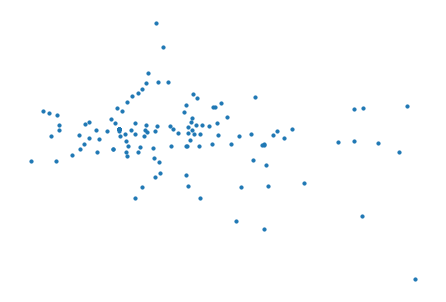

In [10]:
subway_graph = nx.Graph()
subway_graph.add_nodes_from(list(all_locations.keys()))
nx.draw(subway_graph, all_locations, with_labels=False, node_size=10)

In [11]:
#找到为什么画出来的图少了一些点，因为使用高德地图API，打印出来的经纬度有一些是重复的，这个后面有时间再处理下

In [13]:
def get_station_connetoins(all_lines_dict):
    connections = defaultdict(list)
    for s_key in all_lines_dict.keys():  # generate real station network
        for i in range(len(all_lines_dict[s_key])):
            if i == 0:
                connections[all_lines_dict[s_key][i]].append(all_lines_dict[s_key][i + 1])
            elif i == len(all_lines_dict[s_key]) - 1:
                connections[all_lines_dict[s_key][i]].append(all_lines_dict[s_key][i - 1])
            else:
                connections[all_lines_dict[s_key][i]].append(all_lines_dict[s_key][i - 1])
                connections[all_lines_dict[s_key][i]].append(all_lines_dict[s_key][i + 1])
    print('所有相连接站点信息:', len(connections))
    return connections

In [14]:
all_connection = get_station_connetoins(all_lines)

所有相连接站点信息: 224


In [15]:
print(all_connection)

defaultdict(<class 'list'>, {'广州东站': ['体育中心', '林和西', '燕塘'], '体育中心': ['广州东站', '体育西路'], '体育西路': ['体育中心', '杨箕'], '杨箕': ['体育西路', '东山口', '五羊邨', '动物园'], '东山口': ['杨箕', '烈士陵园', '东湖', '区庄'], '烈士陵园': ['东山口', '农讲所'], '农讲所': ['烈士陵园', '公园前'], '公园前': ['农讲所', '西门口', '纪念堂', '海珠广场'], '西门口': ['公园前', '陈家祠'], '陈家祠': ['西门口', '长寿路'], '长寿路': ['陈家祠', '黄沙'], '黄沙': ['长寿路', '芳村', '如意坊', '文化公园'], '芳村': ['黄沙', '花地湾'], '花地湾': ['芳村', '坑口'], '坑口': ['花地湾', '西塱'], '西塱': ['坑口', '鶴洞', '菊树'], '嘉禾望岗': ['黄边', '白云大道北', '龙归', '白雲東平', '紅衛'], '黄边': ['嘉禾望岗', '江夏'], '江夏': ['黄边', '萧岗'], '萧岗': ['江夏', '白云文化广场'], '白云文化广场': ['萧岗', '白云公园'], '白云公园': ['白云文化广场', '飞翔公园'], '飞翔公园': ['白云公园', '三元里'], '三元里': ['飞翔公园', '广州火车站'], '广州火车站': ['三元里', '越秀公园', '小北', '西村'], '越秀公园': ['广州火车站', '纪念堂'], '纪念堂': ['越秀公园', '公园前'], '海珠广场': ['公园前', '市二宫', '一德路', '北京路'], '市二宫': ['海珠广场', '江南西'], '江南西': ['市二宫', '昌岗'], '昌岗': ['江南西', '江泰路', '宝岗大道', '晓港'], '江泰路': ['昌岗', '东晓南'], '东晓南': ['江泰路', '南洲'], '南洲': ['东晓南', '洛溪', '瀝滘', '石溪'], '洛溪': ['南洲', '南浦'], '南浦': ['洛溪', '会江']

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [22]:
def search(start, end, all_connection):
    """
    找到2个地铁站的路线路
    :param start:地铁站,str
    :param end:地铁站,str
    :param all_connection:所有相连接站点信息defaultdict
    :return:列表
    """
    pathes = [[start]]
    passed = [start]

    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        nxt = all_connection.get(frontier)
        for station in nxt:
            if station in passed:
                continue
            else:
                new_path = path + [station]
                pathes.append(new_path)
                if station == end: return new_path
                passed.append(station)

In [23]:
def pretty_print(lst):
    print("->".join(lst))

In [24]:
    pretty_print(search(start='广州东站', end='万胜围', all_connection=all_connection))

广州东站->体育中心->体育西路->杨箕->五羊邨->珠江新城->猎德->潭村->员村->科韵路->车陂南->万胜围


In [25]:
    pretty_print(search(start='广州东站', end='大学城南', all_connection=all_connection))

广州东站->体育中心->体育西路->杨箕->五羊邨->珠江新城->猎德->潭村->员村->科韵路->车陂南->万胜围->官洲->大学城北->大学城南


In [26]:
    pretty_print(search(start='大学城南', end='广州东站', all_connection=all_connection))

大学城南->大学城北->官洲->万胜围->车陂南->科韵路->员村->潭村->猎德->珠江新城->五羊邨->杨箕->体育西路->体育中心->广州东站


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)